
# **Project Title: EDA on Indian Agriculture Production**

# **🎯 Objective:**
The primary objective of the Project is to perform Exploratory Data Analysis (EDA) on the Indian Agriculture Production dataset to:

Understand patterns and trends in crop production across Indian states and seasons.

Identify the highest producing crops and regions.

Analyze the impact of crop category, area under cultivation, and seasonal factors.

Generate visual and statistical insights for potential policy-making or agritech solutions.


# **Dataset Overview :**

**Dataset Name:** crop_production.csv

**Shape of Dataset:** Rows = 246091, Columns = 7

# **Features :**

**State_Name :**	Name of the Indian state where the crop is cultivated \\
**District_Name :**	District within the state \\
**Crop_Year	:** Year of crop production \\
**Season :**	Season in which the crop was grown (e.g., Kharif, Rabi) \\
**Crop :**	Name of the crop \\
**Area :**	Area under cultivation (in hectares) \\
**Production :**	Amount of crop produced (in tonnes or applicable units)
# **Null Values Handling :**
Only the Production column had null values. \\
Removed nulls via interpolation
Sorted the dataset by Crop_Year and applied linear interpolation on the Production column to estimate missing values based on surrounding data.

# **Feature Engineering :**
**🔹 Zones :**
Created a new column Zones to divide Indian states into:
North, South, East, West, Central, NE, and Union Territories.

**🔹 Crop Categories :**
Introduced crop_category column to classify crops into:
Cereal, Pulses, Fruits, Vegetables, Oilseeds, Spices, Fibres, Nuts, Commercial, and Other.



# **Key Analytical Insights Aimed for Extraction :**

🔹 Which Indian state leads in overall agricultural production?

🔹 Which state has the largest area under crop cultivation?

🔹 What is the highest-produced crop in each state?

🔹 Which state produces the maximum amount of each specific crop?

🔹 Which geographical zone contributes the most to India's crop production?

🔹 Which crops are the top three in terms of total production across the country?

🔹 In which years did India see peak crop production levels?

🔹 Which season contributes the most to crop production in India?

🔹 Which crop categories (e.g., Cereals, Pulses, Oilseeds) dominate in production volume?



In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crop_production.csv")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [ ]:
df.shape

(246091, 7)

In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


HANDLING THE NULL VALUES

In [ ]:
df.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
246086,False,False,False,False,False,False,False
246087,False,False,False,False,False,False,False
246088,False,False,False,False,False,False,False
246089,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


Production column contains null values so as the dataset is a time series data so we are using linearinterpolation to handle null values

In [ ]:
df = df.sort_values(by='Crop_Year')
df['Production'] = df['Production'].interpolate(method='linear')

In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


In [ ]:
df.shape

(246091, 7)

Analyzing all The columns in the Dataset

In [ ]:
# Names of all columns in the Dataset
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df['State_Name'].unique()

array(['Gujarat', 'Uttar Pradesh', 'Maharashtra', 'Bihar',
       'Andhra Pradesh', 'Telangana ', 'Madhya Pradesh', 'Tamil Nadu',
       'West Bengal', 'Manipur', 'Assam', 'Meghalaya', 'Haryana',
       'Mizoram', 'Nagaland', 'Goa', 'Odisha', 'Kerala', 'Karnataka',
       'Punjab', 'Rajasthan', 'Jammu and Kashmir ', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Tripura', 'Sikkim', 'Puducherry',
       'Chandigarh', 'Dadra and Nagar Haveli',
       'Andaman and Nicobar Islands', 'Uttarakhand', 'Chhattisgarh',
       'Jharkhand'], dtype=object)

In [ ]:
df['State_Name'].nunique()

33

In [ ]:
df['State_Name'].value_counts()

,count
State_Name,
Uttar Pradesh,33306
Madhya Pradesh,22943
Karnataka,21122
Bihar,18885
Assam,14628
Odisha,13575
Tamil Nadu,13547
Maharashtra,12628
Rajasthan,12514


In [ ]:
#State Name is a relevant feature, It contains 33 Unique Values and they are String type

In [ ]:
df['District_Name'].unique()

array(['JAMNAGAR', 'MORADABAD', 'AKOLA', 'JUNAGADH', 'AMRAVATI',
       'JEHANABAD', 'ETAWAH', 'AURANGABAD', 'BEED', 'AHMEDNAGAR',
       'ANANTAPUR', 'MAHBUBNAGAR', 'KAIMUR (BHABUA)', 'JAMUI', 'BHANDARA',
       'ETAH', 'GANDHINAGAR', 'VIDISHA', 'SAHARANPUR', 'BULDHANA',
       'KACHCHH', 'KATIHAR', 'KHEDA', 'GOPALGANJ', 'CHANDRAPUR',
       'KHAMMAM', 'MEDAK', 'FAIZABAD', 'UJJAIN', 'DHULE', 'TIKAMGARH',
       'KHAGARIA', 'GAYA', 'KARIMNAGAR', 'GADCHIROLI', 'DEORIA',
       'HYDERABAD', 'SIDHI', 'FARRUKHABAD', 'JALGAON', 'SHIVPURI', 'DANG',
       'DARBHANGA', 'MAHESANA', 'JALNA', 'KISHANGANJ', 'KOLHAPUR',
       'CHITTOOR', 'BUXAR', 'SHAJAPUR', 'CHITRAKOOT', 'SHAHDOL', 'LATUR',
       'FATEHPUR', 'NAGPUR', 'MUMBAI', 'BHAVNAGAR', 'SEONI', 'LAKHISARAI',
       'ADILABAD', 'BHOJPUR', 'RAMPUR', 'PANCH MAHALS', 'NANDED',
       'SEHORE', 'MADHEPURA', 'VIRUDHUNAGAR', 'CHANDAULI', 'NASHIK',
       'BHAGALPUR', 'SATNA', 'VILLUPURAM', '24 PARAGANAS NORTH', 'SAGAR',
       'OSMANABAD', 'FIROZ

In [ ]:
df['District_Name'].nunique()

646

In [ ]:
df['District_Name'].value_counts()

,count
District_Name,
BIJAPUR,945
TUMKUR,936
BELGAUM,925
HASSAN,895
BELLARY,887
...,...
HYDERABAD,8
RAMGARH,6
KHUNTI,6


In [ ]:
# District Name is a relevant feature, It contains 646 Unique Values and they are of String type

In [ ]:
df['Crop_Year'].describe()

,Crop_Year
count,246091.000000
mean,2005.643018
std,4.952164
min,1997.000000
25%,2002.000000
50%,2006.000000
75%,2010.000000
max,2015.000000


In [ ]:
df["Crop_Year"].value_counts()

,count
Crop_Year,
2003,17287
2002,16671
2008,14550
2007,14526
2006,14328
2004,14117
2009,14116
2011,14071
2010,14065


In [ ]:
df['Crop_Year'].nunique()

19

In [ ]:
# Crop_Year feature contains the data regarding to which year the record belongs.This column contains 19 unique years starting from the year 1997 to 2015.

In [ ]:
df["Season"].unique()

array(['Whole Year ', 'Summer     ', 'Rabi       ', 'Kharif     ',
       'Autumn     ', 'Winter     '], dtype=object)

In [ ]:
df["Season"].nunique()

6

In [ ]:
df["Season"].value_counts()

,count
Season,
Kharif,95951
Rabi,66987
Whole Year,57305
Summer,14841
Winter,6058
Autumn,4949


In [ ]:
# Season feature describes about which season the crop is cultivated and it contains 6 unique values.

In [ ]:
df["Crop"].unique()

array(['Garlic', 'Maize', 'Onion', 'Potato', 'Pulses total', 'Sesamum',
       'Sugarcane', 'Groundnut', 'Bajra', 'Wheat', 'Moong(Green Gram)',
       'Rice', 'Urad', 'Jowar', 'Other  Rabi pulses', 'Cotton(lint)',
       'Arhar/Tur', 'Dry chillies', 'Moth', 'Gram', 'Other Kharif pulses',
       'Small millets', 'Barley', 'Linseed', 'Banana', 'Castor seed',
       'Total foodgrain', 'Dry ginger', 'Rapeseed &Mustard',
       'Oilseeds total', 'Masoor', 'Peas & beans (Pulses)', 'Sunflower',
       'Horse-gram', 'Ragi', 'Korra', 'Safflower', 'Tobacco', 'Coriander',
       'Sannhamp', 'Sweet potato', 'Turmeric', 'Mesta', 'Samai', 'Paddy',
       'Soyabean', 'Jute', 'Niger seed', 'Tapioca', 'Cardamom',
       'Cashewnut', 'Khesari', 'Arecanut', 'Coconut ', 'Varagu', 'Kapas',
       'Black pepper', 'Other Cereals & Millets', 'Blackgram',
       'other oilseeds', 'Guar seed', 'Tea', 'Jute & mesta',
       'Cond-spcs other', 'other misc. pulses', 'Rubber', 'Coffee',
       'Cabbage', 'Citrus Fr

In [ ]:
df["Crop"].nunique()

124

In [ ]:
df["Crop"].value_counts()

,count
Crop,
Rice,15104
Maize,13947
Moong(Green Gram),10318
Urad,9850
Sesamum,9046
...,...
Plums,6
Pear,6
Peach,4


In [ ]:
# Crop feature contains the data regading the name of the crop and it contains 124 unique crops.

In [ ]:
df["Area"].nunique()


38442

In [ ]:
df["Area"].describe()

,Area
count,2.460910e+05
mean,1.200282e+04
std,5.052340e+04
min,4.000000e-02
25%,8.000000e+01
50%,5.820000e+02
75%,4.392000e+03
max,8.580100e+06


In [ ]:
df["Area"].min()

0.04

In [ ]:
df["Area"].value_counts()

,count
Area,
1.0,4553
2.0,3453
100.0,2824
3.0,2636
4.0,2273
...,...
419814.0,1
45795.0,1
25374.0,1


In [ ]:
# Area feature contains the quantity of area under cultivation the area is measured in hectares it is a important column.

In [ ]:
df['Production'].describe()

,Production
count,2.460910e+05
mean,6.036988e+05
std,1.720116e+07
min,0.000000e+00
25%,9.000000e+01
50%,7.510000e+02
75%,7.220500e+03
max,1.250800e+09


In [ ]:
df['Production'].value_counts()

,count
Production,
1.0,4032
0.0,3543
100.0,3531
2.0,2965
3.0,2313
...,...
1440.3,1
2407.2,1
32748.0,1


In [ ]:
df['Production'].min()

0.0

In [ ]:
# Production feature contains the details regarding the quantity produced and it is also a important feature to be considered.

All the features in the Dataset are relevant to the analysis  \\
We can derive Additional features from the existing features

# **FEATURE ENGINEERING**
ZONES : we are creating a new feature zones which consider the statenames feature to divide the states into varuous zones regarding the indian topology

In [ ]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']


In [ ]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [ ]:
df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

df["Zones"].value_counts()

,count
Zones,
South Zone,54207
North Zone,51468
East Zone,43339
West Zone,33786
Central Zone,33652
NE Zone,28297
Union Terr,1342


Crop_Category : We are creating a new Feature Crop_category which classifies the crops features into various relevant category

In [ ]:
def cat_crop(crop):
    crop_categories = {
        'Cereal': [
            'Rice', 'Maize', 'Wheat', 'Barley', 'Varagu', 'Other Cereals & Millets',
            'Ragi', 'Small millets', 'Bajra', 'Jowar', 'Paddy',
            'Total foodgrain', 'Jobster'
        ],
        'Pulses': [
            'Moong', 'Urad', 'Arhar/Tur', 'Peas & beans', 'Masoor',
            'Other Kharif pulses', 'other misc. pulses', 'Ricebean (nagadal)',
            'Rajmash Kholar', 'Lentil', 'Samai', 'Blackgram', 'Korra',
            'Cowpea(Lobia)', 'Other  Rabi pulses', 'Peas & beans (Pulses)',
            'Pulses total', 'Gram'
        ],
        'Fruits': [
            'Peach', 'Apple', 'Litchi', 'Pear', 'Plums', 'Ber', 'Sapota', 'Lemon',
            'Pome Granet', 'Other Citrus Fruit', 'Water Melon', 'Jack Fruit',
            'Grapes', 'Pineapple', 'Orange', 'Pome Fruit', 'Citrus Fruit',
            'Other Fresh Fruits', 'Mango', 'Papaya', 'Coconut', 'Banana'
        ],
        'Beans': [
            'Bean', 'Lab-Lab', 'Moth', 'Guar seed', 'Soyabean', 'Horse-gram'
        ],
        'Vegetables': [
            'Turnip', 'Peas', 'Beet Root', 'Carrot', 'Yam', 'Ribed Guard',
            'Ash Gourd ', 'Pump Kin', 'Redish', 'Snak Guard', 'Bottle Gourd',
            'Bitter Gourd', 'Cucumber', 'Drum Stick', 'Cauliflower',
            'Beans & Mutter(Vegetable)', 'Cabbage', 'Bhindi', 'Tomato',
            'Brinjal', 'Khesari', 'Sweet potato', 'Potato', 'Onion',
            'Tapioca', 'Colocosia'
        ],
        'Spices': [
            'Perilla', 'Ginger', 'Cardamom', 'Black pepper', 'Dry ginger',
            'Garlic', 'Coriander', 'Turmeric', 'Dry chillies', 'Cond-spcs other'
        ],
        'Fibres': [
            'other fibres', 'Kapas', 'Jute & mesta', 'Jute', 'Mesta',
            'Cotton(lint)', 'Sannhamp'
        ],
        'Nuts': [
            'Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed',
            'Cashewnut Raw', 'Cashewnut', 'Arecanut', 'Groundnut'
        ],
        'Oilseeds': [
            'other oilseeds', 'Safflower', 'Niger seed', 'Castor seed',
            'Linseed', 'Sunflower', 'Rapeseed &Mustard', 'Sesamum',
            'Oilseeds total'
        ],
        'Commercial': [
            'Tobacco', 'Coffee', 'Tea', 'Sugarcane', 'Rubber'
        ]
    }

    for category, crops in crop_categories.items():
        if crop in crops:
            return category
    return 'Other'


In [ ]:
df['crop_category']=df['Crop'].apply(cat_crop)
df['crop_category'].unique()

array(['Spices', 'Cereal', 'Vegetables', 'Pulses', 'Oilseeds',
       'Commercial', 'Nuts', 'Other', 'Fibres', 'Beans', 'Fruits'],
      dtype=object)

In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0
Zones,0
crop_category,0


We have created two new features Zones and crop_category

## Analysis



## Production in each State

In [ ]:
df.groupby(by='State_Name')['Production'].sum().sort_values(ascending=False)

,Production
State_Name,
Kerala,1.042565e+11
Andhra Pradesh,1.735123e+10
Tamil Nadu,1.278711e+10
Uttar Pradesh,3.270339e+09
Assam,2.111797e+09
West Bengal,1.399839e+09
Maharashtra,1.287084e+09
Karnataka,8.645732e+08
Andaman and Nicobar Islands,7.442386e+08


Kerala is the top Producer

## Area under cultivation in each State

In [ ]:
df.groupby(by='State_Name')['Area'].sum().sort_values(ascending = False)

,Area
State_Name,
Uttar Pradesh,4.336316e+08
Madhya Pradesh,3.298131e+08
Maharashtra,3.222062e+08
Rajasthan,2.720249e+08
West Bengal,2.154052e+08
Karnataka,2.029101e+08
Gujarat,1.549440e+08
Andhra Pradesh,1.315458e+08
Bihar,1.282720e+08


Uttar Pradesh is the state which has largest area under cultivation

## State wise highest produced Crops


In [ ]:
state_crop = df.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

state_wise_top_crop = state_crop.loc[state_crop.groupby('State_Name')['Production'].idxmax()]

state_wise_top_crop

,State_Name,Crop,Production
5,Andaman and Nicobar Islands,Coconut,7.177900e+08
32,Andhra Pradesh,Coconut,1.680600e+10
97,Arunachal Pradesh,Rice,2.709477e+06
111,Assam,Coconut,1.954408e+09
179,Bihar,Sugarcane,1.062272e+08
197,Chandigarh,Wheat,3.946500e+04
230,Chhattisgarh,Rice,8.152358e+07
261,Dadra and Nagar Haveli,Sugarcane,1.115995e+06
269,Goa,Coconut,5.031126e+08
307,Gujarat,Sugarcane,2.120228e+08


## Zonal distribution of crops

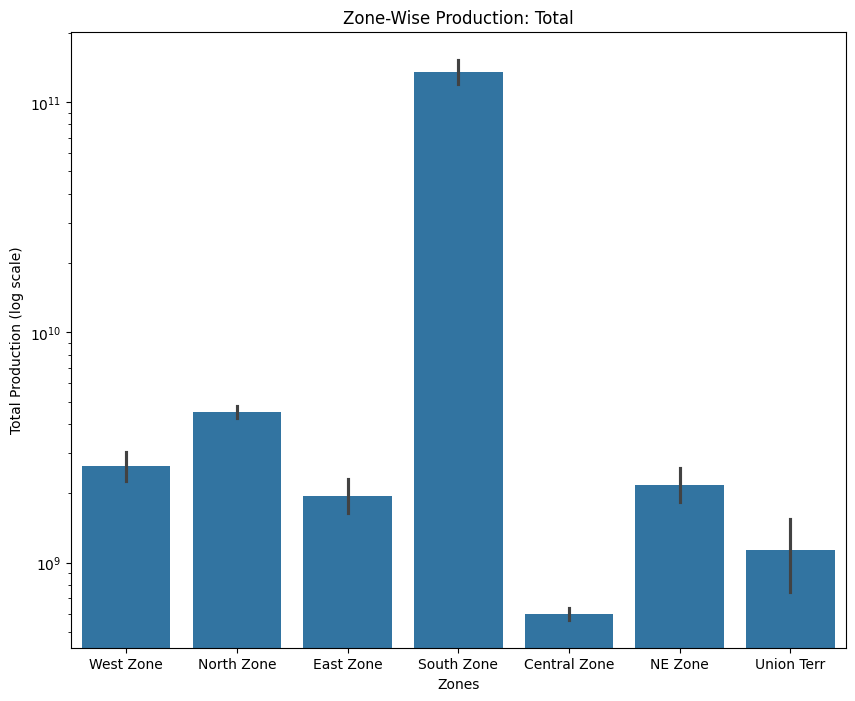

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Zones', y='Production', data=df, estimator=sum)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')
plt.xlabel('Zones')
plt.ylabel('Total Production (log scale)')
plt.show()

The top Producer is South India


## Crop wise Production status


In [ ]:
crop =df.groupby(by = 'Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop

,Crop,Production
28,Coconut,1.299817e+11
34,Cowpea(Lobia),6.070894e+09
106,Sugarcane,5.554106e+09
95,Rice,1.605714e+09
119,Wheat,1.333320e+09
87,Potato,4.254091e+08
32,Coriander,3.431691e+08
92,Rapeseed &Mustard,3.295618e+08
20,Cardamom,3.155292e+08
33,Cotton(lint),2.993233e+08


Text(0.5, 1.0, 'Overall Crops vs Production')

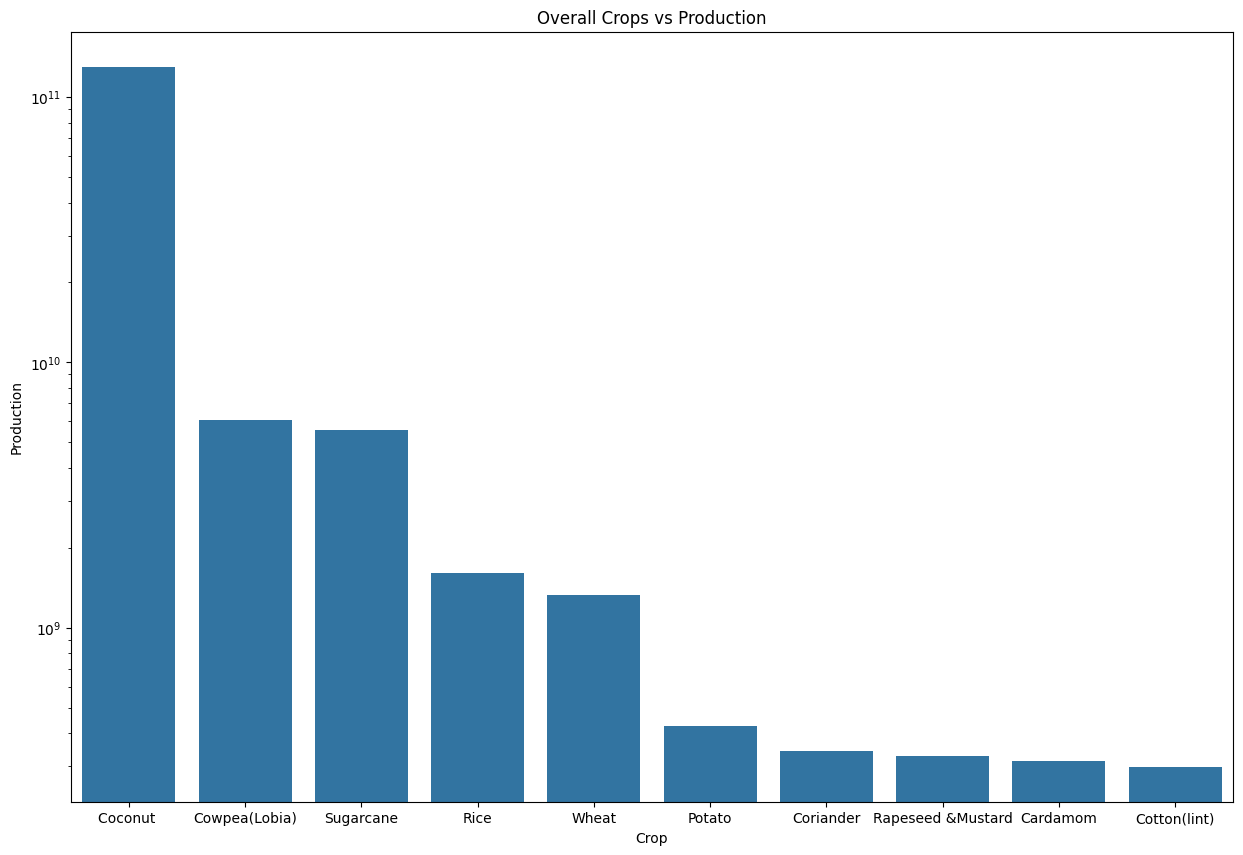

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=crop["Crop"], y=crop["Production"])
plt.yscale('log')
plt.title('Overall Crops vs Production')

Top Crops Production wise are: Coconut, Sugarcane and Rice.

## Year wise Production

<Axes: xlabel='Crop_Year'>

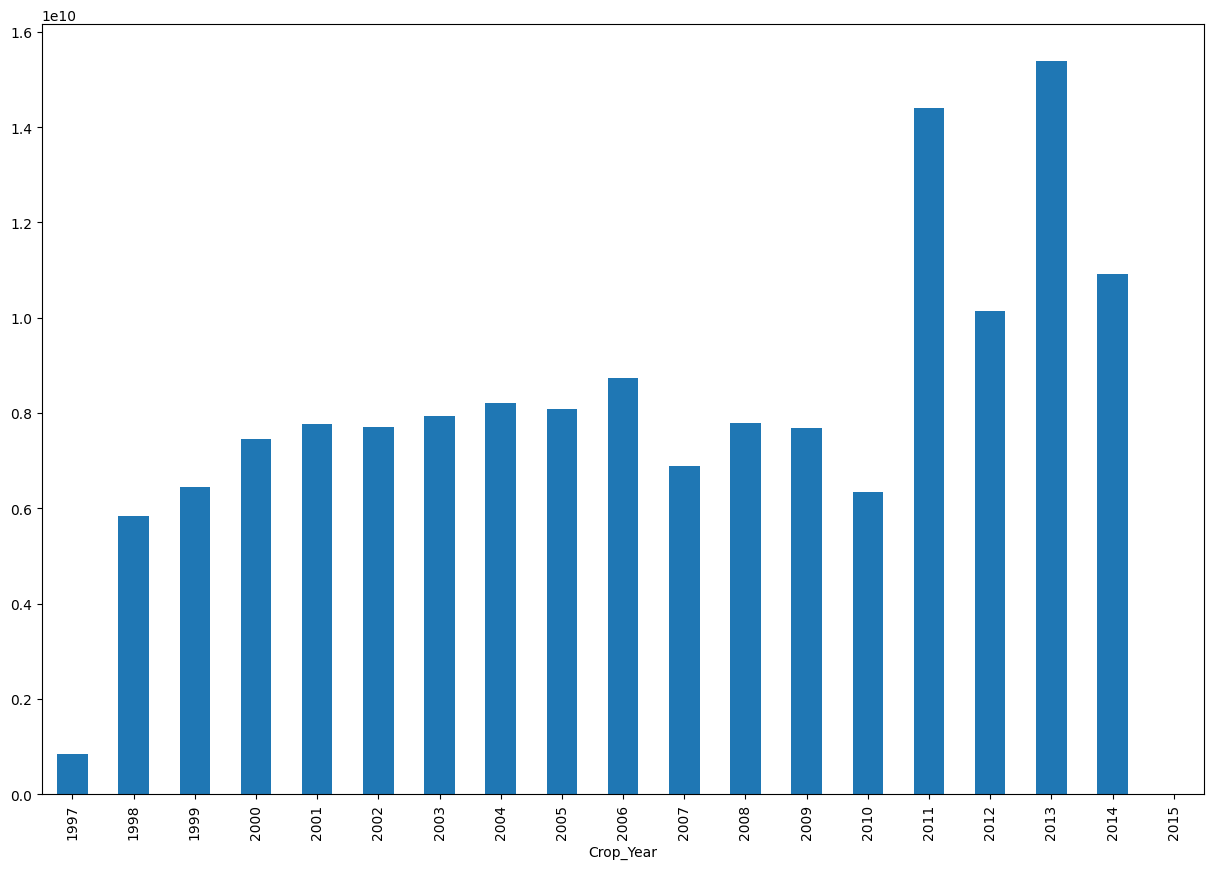

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

Top production years are 2011, 2013 and 2014.

## Season wise crop production


<ipython-input-388-864239474>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=season["Season"], y=season["Production"],errwidth=0)


Text(0.5, 1.0, 'Seasonal Crops vs Production')

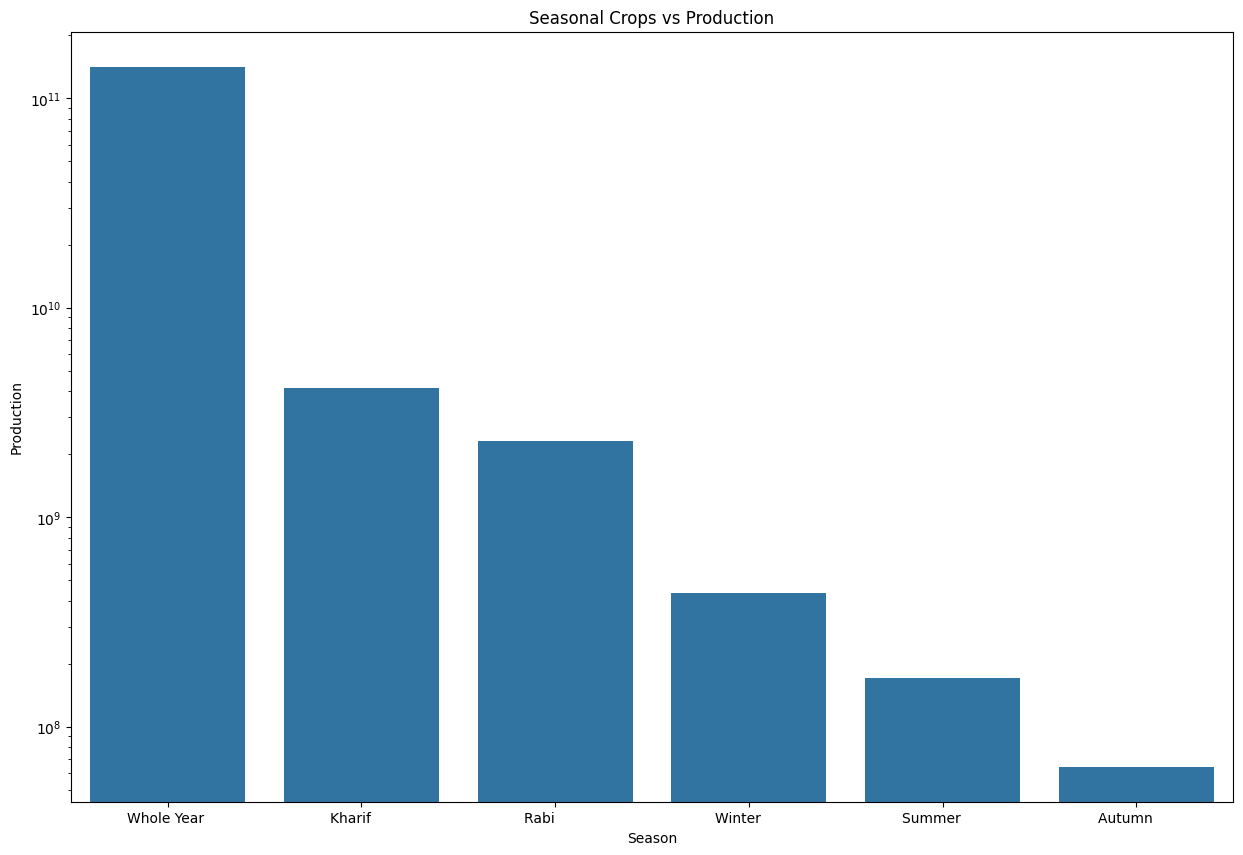

In [ ]:

season = df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=season["Season"], y=season["Production"],errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

 ## Crop wise Production plot describing production values for all crop types

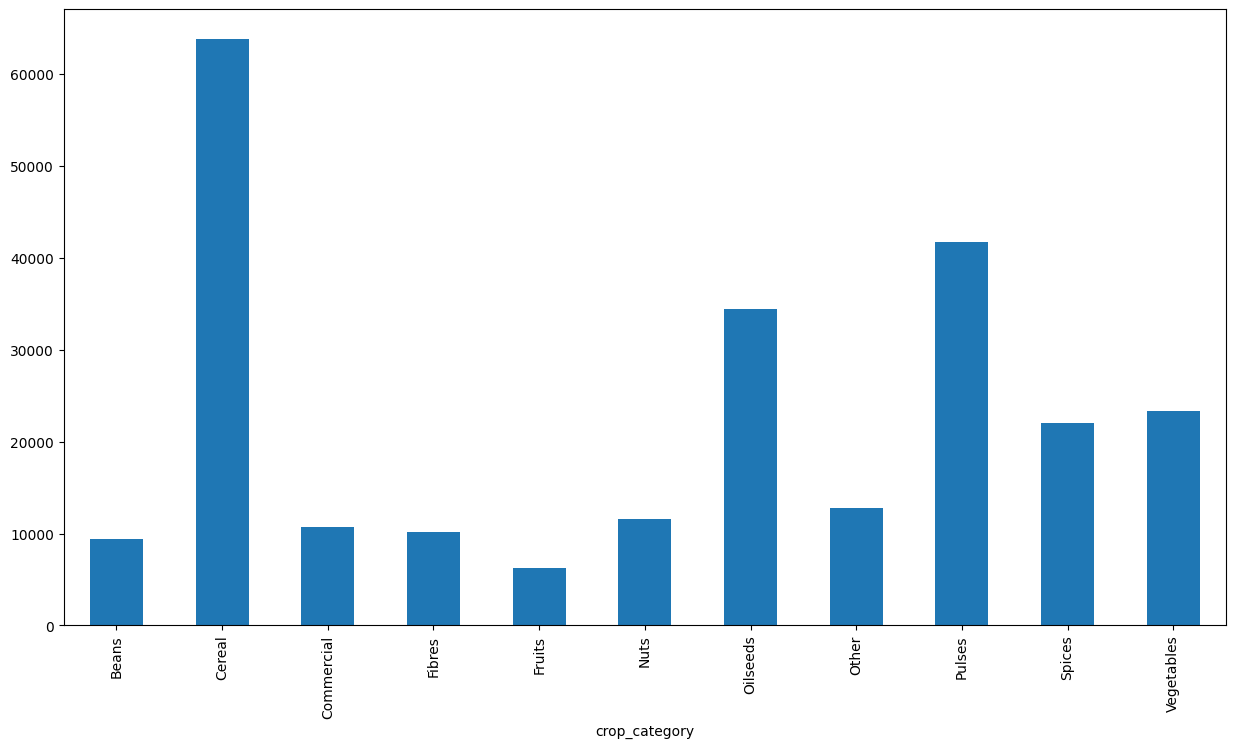

In [ ]:
plt.figure(figsize=(15,8))
df.groupby("crop_category")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds.


# **Insights and Analysis Derived are**
**State-wise Production:**
Kerala leads in total production among all states.

**Area under Cultivation:**
Uttar Pradesh has the largest cultivated area.

**State-wise Top Crops:**
Identified the highest-produced crop for each state.

**Zone-wise Production:**
South Zone contributes the highest total production overall.

**Top Crops:**
Coconut, Sugarcane, and Rice are the most produced crops in India.

**Year-wise Trends:**
Crop production peaked during years 2011, 2013, and 2014.

**Seasonal Impact:**
Kharif season showed the highest production levels among all seasons.

**Crop Category-wise Insight:**
Cereals, Pulses, and Oilseeds dominate production volume.